In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
db = load_diabetes()
X = np.array(db.data)
y = np.array(db.target)
print(f"Data shape: X={X.shape} y={y.shape}")
X_train, X_test, y_train, y_test = train_test_split(X, y)

Data shape: X=(442, 10) y=(442,)


In [33]:
# Set the model parameters.
n_estimators = 100
max_depth = 6
max_features = 3
  
# Create and train model.
rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
rf.fit(X_train, y_train)
  
# Use the model to make predictions on the test dataset.
predictions = rf.predict(X_test)

In [34]:
# Оцінюємо точність
mse = mean_squared_error(y_test, predictions)
print(f"Середньоквадратична помилка (MSE): {mse:.4f}")

Середньоквадратична помилка (MSE): 2709.4420


In [35]:
X_grid = np.linspace(np.min(X), np.max(X), 1000).reshape(100, 10)
y_grid_pred = rf.predict(X_grid)

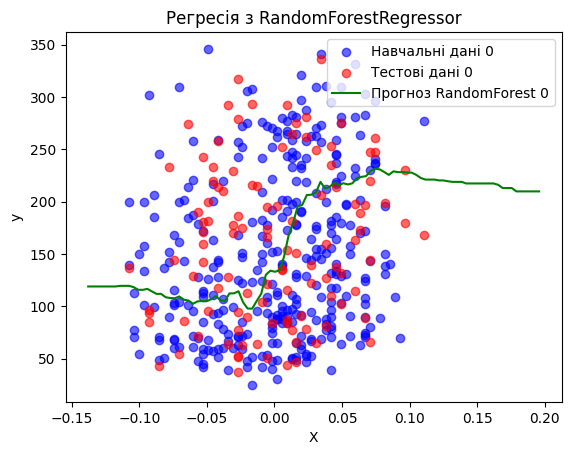

In [36]:
# Візуалізація
f = 0
plt.scatter(X_train[:, f], y_train, label=f"Навчальні дані {f}", color="blue", alpha=0.6)
plt.scatter(X_test[:, f], y_test, label=f"Тестові дані {f}", color="red", alpha=0.6)
plt.plot(X_grid[:, f], y_grid_pred, label=f"Прогноз RandomForest {f}", color="green")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Регресія з RandomForestRegressor")
plt.show()